## Creating the benchmark model for comparison

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os, cv2, random

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder

In [4]:
# Importing the keras libraries
from keras.models import Sequential
from keras.layers import Dense, Activation, GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.utils import np_utils

from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Model
from keras import backend as K
from glob import glob

Using TensorFlow backend.


## Uploading the Dataset

In [5]:
print(os.getcwd())

D:\Documents\Personal\Nano Degrees\Machine Learning Engineer\MLND Project


In [6]:
train_dir = 'train/'
test_dir = 'test_stg1/'

# Getting the name of the classes of fish
fish_classes = os.listdir(train_dir)[1:len(os.listdir(train_dir))]
print(fish_classes)

['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']


In [7]:
# Getting the train images in totality
image_path = []
for x in fish_classes:
    fish_images = [train_dir+x+'/'+value for value in os.listdir(train_dir+x+'/')]
    image_path.extend(fish_images)

print('There are a total of %d images in the train folder' % len(image_path))

There are a total of 3777 images in the train folder


In [8]:
# Getting the train images per folder
total_labels = []
for y in fish_classes:
    label = [y]*len(os.listdir(train_dir+y+'/'))
    total_labels.extend(label)

Text(0,0.5,'No. of Images')

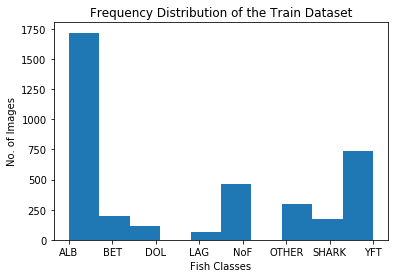

In [9]:
# Plotting the frequency plot for train images

plt.hist(total_labels)
plt.title('Frequency Distribution of the Train Dataset')
plt.xlabel('Fish Classes')
plt.ylabel('No. of Images')

In [10]:
# Extracting the color histogram
def extract_color_histogram(image, bins=(8, 8, 8)):
    # extract a 3D color histogram from the HSV color space using
    # the supplied number of `bins` per channel
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)

    # return the flattened histogram as the feature vector
    return hist.flatten()

In [11]:
# Encoding the total labels
labels = LabelEncoder().fit_transform(total_labels)

In [12]:
features = []
for i,image_p in enumerate(image_path):
    image = cv2.imread(image_p)
    hist = extract_color_histogram(image)
    features.append(hist)
    if(i%1000==0):
        print(str(i)+ "  completed")

0  completed
1000  completed
2000  completed
3000  completed


In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(features, labels, test_size = 0.2, random_state = 10)

Text(0,0.5,'No. of Images')

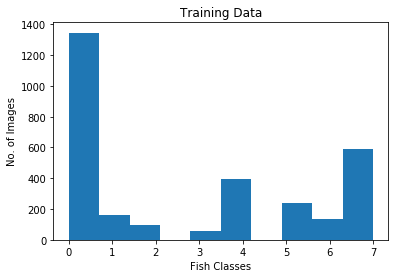

In [14]:
plt.hist(y_train)
plt.title("Training Data")
plt.xlabel("Fish Classes")
plt.ylabel("No. of Images")

(0, 1400)

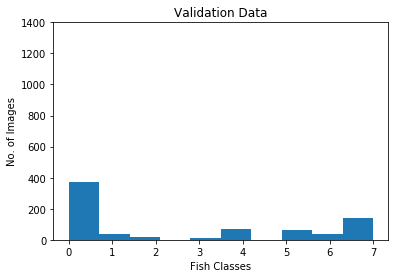

In [15]:
plt.hist(y_valid)
plt.title("Validation Data")
plt.xlabel("Fish Classes")
plt.ylabel("No. of Images")
plt.ylim([0,1400])

In [16]:
# Using Gaussian Naive Bayes for prediction
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predicted = model.predict_proba(X_valid)
predicted_class = model.predict(X_valid)

In [17]:
print(predicted)

[[  0.00000000e+000   0.00000000e+000   0.00000000e+000 ...,
    8.77907258e-301   1.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   8.77850628e-313 ...,
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   1.00000000e+000 ...,
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 ..., 
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000 ...,
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 [  2.32314673e-207   2.77893309e-150   1.87688999e-005 ...,
    9.99981231e-001   0.00000000e+000   7.13864943e-212]
 [  1.00000000e+000   2.28370466e-142   0.00000000e+000 ...,
    0.00000000e+000   0.00000000e+000   9.17474715e-039]]


In [18]:
print(y_valid[0:4])

[6 0 2 0]


In [31]:
fish_classes[6]

'SHARK'

In [37]:
valid_set = []
for i in y_valid:
    x = fish_classes[i]
    valid_set.append(x)

In [38]:
predicted_set = []
for i in predicted_class:
    x = fish_classes[i]
    predicted_set.append(x)

In [41]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(valid_set, predicted_set, labels = fish_classes)

In [40]:
# Graph of confusion Matrix
import itertools
np.set_printoptions(precision=2)
print(__doc__)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')plt.figure()
plot_confusion_matrix(cm, classes=fish_classes,
                      title='Confusion matrix, without normalization')
plt.show()

Automatically created module for IPython interactive environment


Confusion matrix, without normalization
[[100  30  37  51  54  53   9  39]
 [  0  11   8   2   0   7   9   0]
 [  0   0  20   0   0   0   0   0]
 [  0   0   0  13   0   0   0   0]
 [  4   4  11   6  33   5   1   6]
 [  0   0   1  22   0  28  11   1]
 [  0   0   0   0   0   0  39   0]
 [  2  11  39   9   5  17   7  51]]


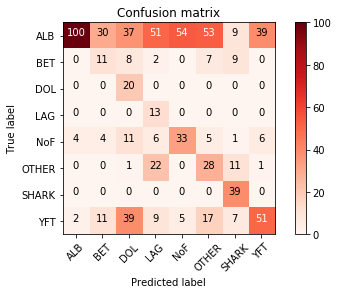

In [42]:
plt.figure()
plot_confusion_matrix(cm2, classes=fish_classes,
                      title='Confusion matrix')
plt.show()

In [20]:
model.score(X_valid, y_valid)

0.39021164021164023

In [89]:
log_loss(y_valid, predicted)

19.522768821729727

In [141]:
from scipy.spatial.distance import minkowski

In [142]:
distances = []

base_image = features[0]
for i in features[1:]:
    m_dist = minkowski(base_image,i)
    distances.append(m_dist)

In [144]:
print(min(distances))

0.027279024943709373


In [149]:
index = distances.index(min(distances))
print(index)

1352


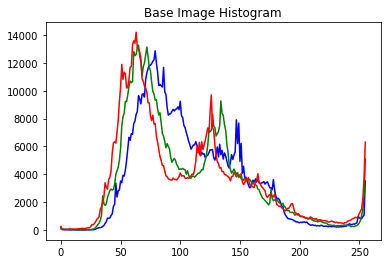

In [164]:
# Now we will compare the plots for observation 0 and observation 1352
img = cv2.imread(image_path_list[0])
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.title("Base Image Histogram")
    plt.autoscale()

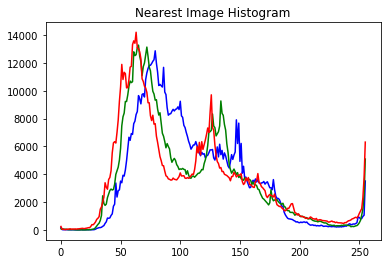

In [165]:
img2 = cv2.imread(image_path_list[index])
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.title("Nearest Image Histogram")
    plt.autoscale()

Text(0.5,1,'Base Image')

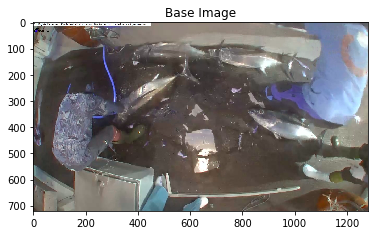

In [159]:
plt.imshow(cv2.imread(image_path_list[0]))
plt.title("Base Image")

Text(0.5,1,'Image for which the Minkowski distance is minimum')

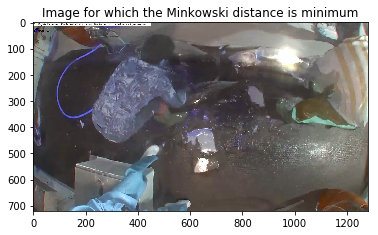

In [160]:
plt.imshow(cv2.imread(image_path_list[1352]))
plt.title("Image for which the Minkowski distance is minimum")